In [1]:
import numpy as np
# import pandas as pd
from IPython.display import display

from PIL import Image
from io import BytesIO
from urllib import request

from sklearn.cluster import DBSCAN

import tensorflow as tf
from tensorflow import keras

# from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from tensorflow.keras.applications.xception import Xception
# from tensorflow.keras.applications.xception import preprocess_input
# from tensorflow.keras.applications.xception import decode_predictions

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings(action='ignore')

2023-01-22 17:27:13.481998: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-22 17:27:13.486790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-22 17:27:13.486806: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [141]:
detection_model = keras.models.load_model("/homw/winx/dice-detection-project/models/dice-detection-model-dr03-0.729.h5")
detection_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                           

In [144]:
# tf.saved_model.save(detection_model, "detection-model")


# converter = tf.lite.TFLiteConverter.from_keras_model(detection_model)
# tf_lite_model = converter.convert()

# with open('detection-model-dr03-0729.tflite', 'wb') as f_out:
#     f_out.write(tf_lite_model)


INFO:tensorflow:Assets written to: /tmp/tmp6y4dzoj9/assets


INFO:tensorflow:Assets written to: /tmp/tmp6y4dzoj9/assets
2023-01-22 20:58:48.098295: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-01-22 20:58:48.098341: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-01-22 20:58:48.099174: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp6y4dzoj9
2023-01-22 20:58:48.102487: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2023-01-22 20:58:48.102513: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmp6y4dzoj9
2023-01-22 20:58:48.132953: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-01-22 20:58:48.135740: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-01-22 20:58:48.368957: I tensorflow/cc/saved_model/loader.cc:212] Running initializatio

In [145]:
# Feature map model creation
model = detection_model
n_layer = 4
img_size = 128

inputs = keras.Input(shape=(img_size, img_size, 3))

viz_model = keras.Model(inputs=detection_model.inputs, outputs=detection_model.layers[n_layer].output)


In [146]:
# tf.saved_model.save(viz_model, "viz-model")

converter = tf.lite.TFLiteConverter.from_keras_model(viz_model)
tf_lite_model = converter.convert()

with open('viz-model-dr03-0729.tflite', 'wb') as f_out:
    f_out.write(tf_lite_model)


INFO:tensorflow:Assets written to: /tmp/tmpb62n9wv2/assets


INFO:tensorflow:Assets written to: /tmp/tmpb62n9wv2/assets
2023-01-22 21:01:39.288310: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-01-22 21:01:39.288349: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-01-22 21:01:39.288540: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpb62n9wv2
2023-01-22 21:01:39.289811: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2023-01-22 21:01:39.289833: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpb62n9wv2
2023-01-22 21:01:39.293031: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2023-01-22 21:01:39.311888: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpb62n9wv2
2023-01-22 21:01:39.320749: I tensorflow/cc/saved_model/loader.cc:301] SavedModel

In [76]:
img_size = 128

classes = [
    'd10',
    'd12',
    'd20',
    'd4',
    'd6',
    'd8',
    'dicesback'
]

# start_path = '/kaggle/input/dice-d4-d6-d8-d10-d12-d20-images/dice' # for categorical sampling dice vs dice
# start_path = '/kaggle/working/dice' # for binary sampling dice vs blanc
# path = f"{start_path}/dice/valid/d10"
# file = "d10_top179.jpg"

lst = [
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230109_011654__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230109_013921__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230109_014133__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205235__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205256__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205346__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205406__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205427__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011213__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011222__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011232__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011243__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011252__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011303__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011323__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011335__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011343__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011354__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230112_193332__01.jpg"
]

lst_d10 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230110_205427__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192635__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192652__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192848__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192853__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_193157__01.jpg"
]

lst_d12 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192520__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192534__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192546__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192834__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192841__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193148__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193213__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193259__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193327__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193332__01.jpg"
]

lst_d20 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230110_205406__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192626__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192722__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192933__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192939__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192939__02.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_193253__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_193309__01.jpg"
]

lst_d4 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230110_205235__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230110_205256__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192658__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192703__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192758__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192807__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192900__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192912__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193052__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193106__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193125__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193131__01.jpg",
]

lst_d6 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_192616__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_192709__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_192816__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_193207__01.jpg",
]

lst_d8 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230109_011654__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230109_013921__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230110_205346__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192641__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192646__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192715__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192920__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192927__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193034__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193041__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193224__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193231__01.jpg",
]

lst_back = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-IMG_20230110_205256__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color001.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color223.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color338.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color501.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color604.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_off-angle_0231.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_color095.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_color263.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_color351.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_wood611.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_wood888.jpg"
]

lst_few = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/few-dices/IMG_20230109_014133__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/few-dices/IMG_20230116_002416__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/few-dices/IMG_20230116_002559__01.jpg"
]


def download_image(url):
    
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

def preprocess(X, rescale=255):
    
    if rescale:
        X = X*1./rescale
        return X

    return X

def layer_visualization(test_img, model, preprocess=preprocess, n_layer=4, img_size=299):
    
    if not isinstance(test_img, np.ndarray):
        x = np.array(test_img)
        X = np.array([x])
        X = preprocess(X)
    else:
        X = np.array([test_img])
    
    inputs = keras.Input(shape=(img_size, img_size, 3))

    viz_model = keras.Model(inputs=model.inputs, outputs=model.layers[n_layer].output)
    num_filters = viz_model.get_layer(index=n_layer).output.get_shape()[-1]

    display(viz_model.summary())

    features = viz_model.predict(X)[0]

    fig = plt.figure(figsize=(20, 15)) #, int(0.1*num_filters)))
    for i in range(1,features.shape[-1]):

        plt.subplot(int(num_filters/4)+1,4,i)
        plt.imshow(features[:,:,i-1] , cmap='gray')
    plt.tight_layout()
    plt.show()

def predict(X, model):

    class_prob = model.predict(X)

    return class_prob[0]

def get_feature_maps(X, model, img_size, n_layer=4):
    
    inputs = keras.Input(shape=(img_size, img_size, 3))

    viz_model = keras.Model(inputs=model.inputs, outputs=model.layers[n_layer].output)
    
    features = viz_model.predict(X)[0]
    
    return features


def get_feature_mask(feature_maps):
    """
    mask selection based on the less intercross
    """
    
    feature_maps[feature_maps > 0] = 1

    mask_sum = np.sum(np.sum(feature_maps, axis=0), axis=0)
    sel_layers = (mask_sum > 0.05*np.max(mask_sum))&(mask_sum < 0.95*np.max(mask_sum))

    selected_maps = feature_maps[:,:, sel_layers].copy()
    n = selected_maps.shape[-1]
    cross_scores = np.array([[np.sum(selected_maps[:,:, i]*selected_maps[:,:,j], dtype='int') if i<j else +np.inf for j in range(n)] for i in range(n)])

    # there can be multiple i,j combinations following upsample_mask function can handle few results
    i, j = np.where(cross_scores == np.min(cross_scores))

    print(i,j)
    if np.sum(selected_maps[:,:,i]) < np.sum(selected_maps[:,:,j]):
        fin_mask = selected_maps[:,:,i]
    else:
        fin_mask = selected_maps[:,:,j]

    # clearing the borders
    fin_mask[[0,fin_mask.shape[1]-1], :, :] = 0
    fin_mask[:, [0,fin_mask.shape[0]-1], :] = 0
        
    return fin_mask


def get_mask(features, threshold=1.5): #sample_url, viz_model, n_layer):
    """
    Mask selection based on mean feature maps approach
    """
    
    num_filters = features.shape[-1]
    
    avg_map = np.mean(features)

    map_mask = [1 if avg_map<np.mean(features[:, :, i]) else 0 for i in range(num_filters)]
    
    mean_mask = np.mean(features[:,:, map_mask], axis=-1)
    
    mean_mask[mean_mask < threshold*np.mean(mean_mask)] = 0
    
    return mean_mask


def upsample_mask(f_mask):
    
    mask_size = f_mask.shape[0]

    inputs = keras.Input((mask_size, mask_size, 1))

    upsampling_1 = keras.layers.UpSampling2D(size=(2,2), interpolation="nearest")(inputs)
    upsampling_2 = keras.layers.UpSampling2D(size=(2,2), interpolation="nearest")(upsampling_1)

    mask_model = keras.Model(inputs=inputs, outputs=upsampling_2)
    
    return mask_model


def get_clusters(mask, n_map = 0):
    
    get_labels = DBSCAN(eps=5, min_samples=35)

    points = list(zip(*np.where(mask[:,:,n_map] >0)))

    if points:
        labels = get_labels.fit_predict(points)
        
        labeled_mask = np.zeros((img_size, img_size, len(np.unique(labels))))
        
        for i, j, l in zip(*(np.where(mask[:,:,n_map] >0)), labels):
            if l>=0:
                labeled_mask[i, j, l] = 1

        if np.sum(labeled_mask[:,:, -1]) == 0:
            labeled_mask = labeled_mask[:, :, :-1]

        return labeled_mask

    else:
        print("No dices detected")
        
        return None


def get_anchors(labeled_masks):
    clusters = labeled_masks.shape[2]

    anchors = []
    for cluster in range(clusters):
        yx_locs = np.where(labeled_masks[:,:, cluster])

        x_center = int(np.mean(yx_locs[1]))
        y_center = int(np.mean(yx_locs[0]))

        dx = np.ceil((np.max(yx_locs[1]) - np.min(yx_locs[1]))/2.)
        dy = np.ceil((np.max(yx_locs[0]) - np.min(yx_locs[0]))/2.)

        if dx < dy:
            dh = int(dy)
        else:
            dh = int(dx)

        anchors.append([x_center, y_center, dh])
    
    return anchors


def plot_boxes(boxed_sample, anchors, dh=16):
    
    size = boxed_sample.shape[0]
    
    for anchor in anchors:
        # print(anchor)

        x_center = anchor[0]
        y_center = anchor[1]
        
        # h = anchor[2] if not dh else dh
        
        h = max(anchor[2], dh)

        x_min = max(0, x_center - h)
        x_max = min(size-1, x_center + h)
        y_min = max(0, y_center - h)
        y_max = min(size-1, y_center + h)

        # print(x_min, x_max, y_min, y_max)

        box_mask_hmin = [[1 if (i>=x_min)&(i<=x_max)&(j==y_min) else 0 for i in range(size)] for j in range(size)]
        box_mask_hmax = [[1 if (i>=x_min)&(i<=x_max)&(j==y_max) else 0 for i in range(size)] for j in range(size)]
        box_mask_vmin = [[1 if (i==x_min)&(j>=y_min)&(j<=y_max) else 0 for i in range(size)] for j in range(size)]
        box_mask_vmax = [[1 if (i==x_max)&(j>=y_min)&(j<=y_max) else 0 for i in range(size)] for j in range(size)]

        box_mask = np.sum([box_mask_hmin, box_mask_hmax, box_mask_vmin, box_mask_vmax], axis=0)


        boxed_sample[:,:, 0][np.where(box_mask == 1)] = 1
        boxed_sample[:,:, 1][np.where(box_mask == 1)] = 0
        boxed_sample[:,:, 2][np.where(box_mask == 1)] = 0
    
    return boxed_sample


# def get_slices(x, anchors, dh=16, full_size=False):
#     """
#     Getting slice of image based on anchors
#     """
#     size = x.shape[0]

#     slices = {k: anchor for k, anchor in enumerate(anchors)}

#     for k, anchor in slices.items():
            
#             x_center = anchor[0]
#             y_center = anchor[1]

#             # h = anchor[2] if not dh else dh
            
#             h = max(anchor[2], dh)

#             # print(f"Cluster {k} with anchor", x_center, y_center, h)
#             if not full_size:
#                 slice = np.zeros(shape=(2*h, 2*h, 3))
#             else:
#                 slice = np.zeros(shape=(size, size, 3))
            

#             for i in range(2*h):
#                 for j in range(2*h):
#                     x_pix = x_center - h + i
#                     y_pix = y_center - h + j

#                     if x_pix < 0:
#                         x_pix = 0
#                     elif x_pix > size-1:
#                         x_pix = size-1

#                     if y_pix < 0:
#                         y_pix = 0
#                     elif y_pix > size-1:
#                         y_pix = size-1    
                    
#                     if not full_size:
#                         slice[i, j, :] = x[y_pix, x_pix, :]
#                     else:
#                         slice[y_pix, x_pix, :] = x[y_pix, x_pix, :]
            
#             slices[k] = (anchor, slice)
        
#     return slices


1/1 [==============================] - 0s 20ms/step
Dice probability 0.99


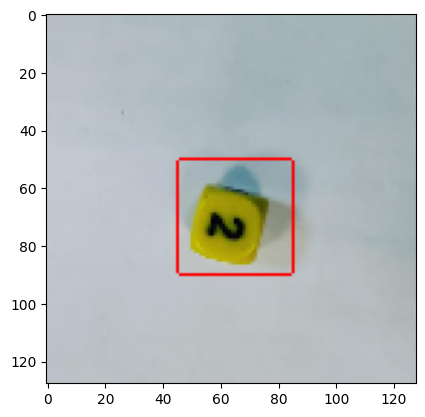

In [139]:
sample_url = lst_d8[0]

sample_img_original = download_image(sample_url)
sample = prepare_image(sample_img_original, (img_size, img_size))

# display(sample)

x = np.array(sample)
x = np.array([x])
X = preprocess(x, 255)

# classes_prob = predict(X, detection_model)
# print(dict(zip(classes, classes_prob)))

f_maps = get_feature_maps(X, detection_model, n_layer=4, img_size=img_size)
f_mask = get_mask(f_maps, threshold=1.6)

mask = f_mask[:,:,np.newaxis].copy()

labeled_masks = get_clusters(mask)
anchors = get_anchors(labeled_masks=labeled_masks)

if anchors:

    valid_anchors = []
    for anchor in anchors:
        # print(anchor)

        x_center = anchor[0]
        y_center = anchor[1]
        h = anchor[2] + 5 

        x_min = max(0, x_center - h)
        x_max = min(img_size-1, x_center + h)
        y_min = max(0, y_center - h)
        y_max = min(img_size-1, y_center + h)

        img_sample = sample.resize((img_size, img_size), box=(x_min, y_min, x_max, y_max))
        # display(img_sample)

        x_sample = np.array(img_sample)
        x_sample = np.array([x_sample])
        X_sample = preprocess(x_sample)

        classes_prob = predict(X_sample, detection_model)

        result = sorted(dict(zip(classes, classes_prob)).items(), reverse=True, key=lambda x: x[1])[0]
        print(f"Dice probability {result[1]:.2f}")

        if result[0] != 'dicesback':
            valid_anchors.append(anchor)

    boxed_sample = plot_boxes(X[0], valid_anchors, dh=15)

    plt.imshow(boxed_sample)
    plt.show()

else:
    print("None")